We will use polynomial to approximate an unknown function $d(x)$ using noisy observations of the function. By varying the degrees of the polynomial, we may observe the trade-offs between bias and variance.
Given a degree of the polynomial, $M$ (=20) experiments will be performed. In each experiment, a fix-sized subset of training samples will be drawn randomly from the training samples $\{ x_i\}$ and corresponding $\{y_i \}$ to estimate the coefficient of a polynomial approximation of $d(x)$. An approximated polynomial then will be evaluated using these estimated coefficients over the entire set of $\{x_i\}$. Out of these $M$ realization of polynomials, we may find an averaged polynomial by averaging their values over each $x_i$. The difference between the averaged polynomial and $d(x)$ gives the bias. We may also find the variance of their values over each $x_i$. This gives the variance of the approximated polynomials. 

In [3]:
import numpy as np

# K = input('#training samples (default = 200): ')
K = 200
xi = np.sort(np.random.rand(K) - .5,axis=0) # uniformly distributed random samples


II. Generate  over $d(x)$ and $\{x_i\}$. Then $y_i = d(x_i) + \epsilon_i$, $\epsilon$ ~ $N(0,0.01)$.

Choice 1. A step function: 
$d(x) = 1$ if $x \geq 0$ , and
$d(x) = 0$  if $x < 0$.

Choice 2. A second order polynomial: 
$d(x) = 1 + 2x + x^2. 

<class 'numpy.matrix'>


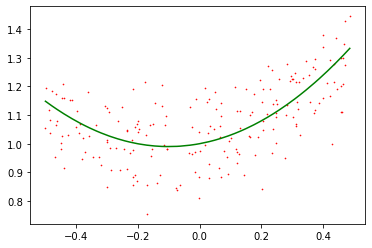

In [8]:
import matplotlib.pyplot as plt

ftype = 2
if ftype == 1:
  dx = xi >= 0
  yi = dx + np.random.randn(K)*.1
elif ftype == 2:
  coef = np.mat([1,0.2,1]).T
  print(type(coef))
   
  dx = np.polyval(coef, xi)
  yi = dx + np.random.randn(K)*0.1

plt.plot(xi,dx,c='green')
plt.scatter(xi,yi,c='red',s=.4)

III. Choose (a) norder - order of the polynomial model, (b) Mtrials - # of repeated trials, (c) SS - the size of subset of training samples for each trial. Then perform repeated trials using subsampled training samples.

Order = 1, bias = 0.06361160318703224, Variance = 0.0021599641357178596
Order = 2, bias = 0.06349457828969958, Variance = 0.0031257187233151825
Order = 3, bias = 0.035159659407774706, Variance = 0.001865136363679565
Order = 4, bias = 0.03515214669847256, Variance = 0.006051221887656996
Order = 5, bias = 0.022565957465741568, Variance = 0.003715277668097649
Order = 6, bias = 0.023220693093099456, Variance = 0.00673364260359804
Order = 7, bias = 0.022427084595218683, Variance = 0.056527299204296944
Order = 8, bias = 0.02165327156098237, Variance = 0.030227048525040184
Order = 9, bias = 0.01891614083969774, Variance = 0.024253654869908648
Order = 10, bias = 0.022710775345447826, Variance = 0.11528493300890026
Order = 11, bias = 0.017405122700200233, Variance = 0.05636068539061993


[Text(0.5, 15.0, 'polynomial order'), Text(27.0, 0.5, 'bias^2')]

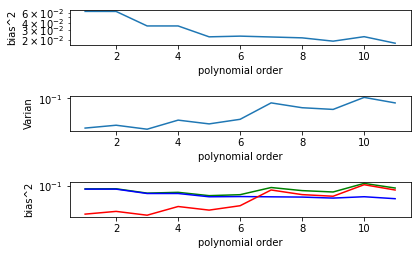

In [3]:
Mtrials = 20 # max # of trials
SS = np.round(.2*K,0).astype('int') # number of training samples sub-sampled

nordermax = 11

bias2 = np.zeros((nordermax))
varian = np.zeros((nordermax))

for norder in range(nordermax):
  fwdx = np.zeros((K,Mtrials)) # initiate F_D(W_D,x) for max trials.
  for ntrial in range(Mtrials):
    idx = np.random.permutation(K)[0:SS] # a set of SS unique random integer from [1:K]
    wd = np.polyfit(xi[idx],yi[idx],norder+1) #fitting polynomial
    fwdx[:,ntrial] = np.polyval(wd,xi) # F(W,x) for x in bx predicted g(x)

  ye = np.mean(fwdx,axis=1) # K x 1 E{F_D(W_DE,x)}
  bias2[norder] = (np.linalg.norm(ye - dx,2)**2)/K
  varian[norder] = np.sum(np.var(fwdx,axis=1))/K
  print("Order = " + str(norder+1) + ", bias = " + str(bias2[norder]) + ", Variance = " + str(varian[norder]))

total_error = bias2 + varian

x = [k + 1 for k in range(nordermax)]
fig, axs = plt.subplots(3)
fig.tight_layout(pad=3)
axs[0].semilogy(x,bias2)
axs[0].set(xlabel="polynomial order",ylabel='bias^2')
axs[1].semilogy(x,varian)
axs[1].set(xlabel="polynomial order",ylabel='Varian')
axs[2].semilogy(x,bias2+varian,c='green')
axs[2].semilogy(x,bias2,c='blue')
axs[2].semilogy(x,varian,c='red')
axs[2].set(xlabel="polynomial order",ylabel='bias^2')